#Program 8
***Refer to the dataset in question 7 and indicate inferences based on the sequence of steps.***

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1



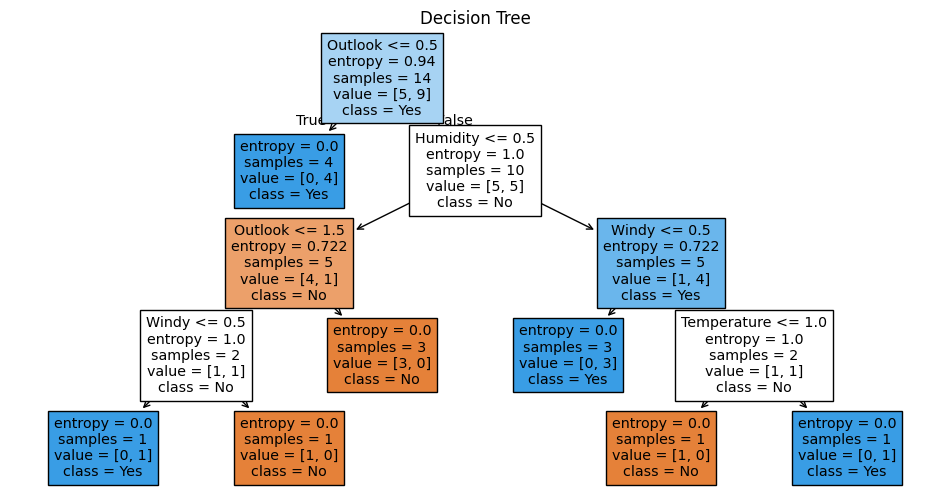

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

data = pd.DataFrame([
    ['Sunny', 'Hot', 'High', 'False', 'No'],
    ['Sunny', 'Hot', 'High', 'True', 'No'],
    ['Overcast', 'Hot', 'High', 'False', 'Yes'],
    ['Rain', 'Mild', 'High', 'False', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'False', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'True', 'No'],
    ['Overcast', 'Cool', 'Normal', 'True', 'Yes'],
    ['Sunny', 'Mild', 'High', 'False', 'No'],
    ['Sunny', 'Cool', 'Normal', 'False', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'False', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'True', 'Yes'],
    ['Overcast', 'Mild', 'High', 'True', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'False', 'Yes'],
    ['Rain', 'Mild', 'High', 'True', 'No']
], columns=['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'])
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop('Play', axis=1)
y = data['Play']

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
feature_names = X.columns
tree_rules = export_text(clf, feature_names=list(feature_names))
print(tree_rules)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=feature_names, class_names=label_encoders['Play'].classes_, filled=True)
plt.title("Decision Tree")
plt.show()